# 02 — EHR Data EDA

**Goal:** Explore synthetic EHR (Electronic Health Records) data.
- Check distributions of diagnosis, medications, vitals
- Detect unrealistic values
- Save figures for README/app


In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ROOT = Path.cwd().parents[0] if Path.cwd().name == "notebooks" else Path.cwd()
DATA_RAW = ROOT / "data" / "raw"
ASSETS = ROOT / "app" / "assets" / "eda"
ASSETS.mkdir(parents=True, exist_ok=True)

csv_path = DATA_RAW / "patient_ehr.csv"
df = pd.read_csv(csv_path)
df.head()

,patient_id,diagnosis,medication,blood_pressure,heart_rate,glucose_level
0,1,Coronary Artery Disease,Atorvastatin,103/84,63,153
1,2,Hypertension,Lisinopril,136/92,84,156
2,3,Asthma,Albuterol,150/63,106,77
3,4,Hypertension,Amlodipine,108/90,71,167
4,5,Coronary Artery Disease,Aspirin,123/80,106,142


In [4]:
display("Shape :", df.shape)
df.dtypes

nulls = df.isnull().sum()

display("Null Values:",nulls)

'Shape :'

(200, 6)

'Null Values:'

patient_id         0
diagnosis          0
medication        44
blood_pressure     0
heart_rate         0
glucose_level      0
dtype: int64

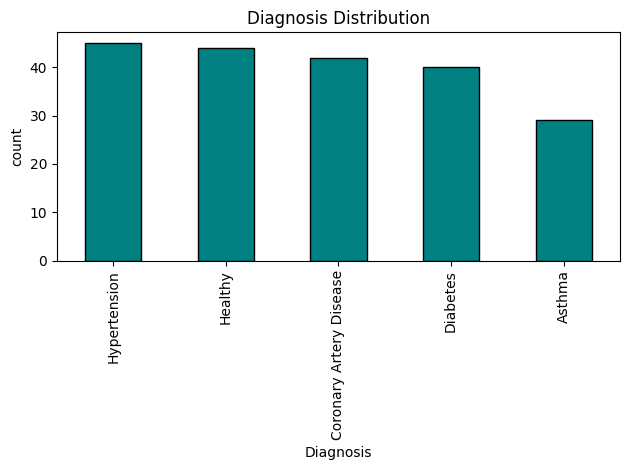

In [7]:
#diagnosis distribution
diag_counts = df['diagnosis'].value_counts()

diag_counts.plot(kind='bar',color='teal',edgecolor='black')
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('count')
plt.tight_layout()
plt.savefig(ASSETS / 'diagnosis_distribution.png', dpi=150)
plt.show()

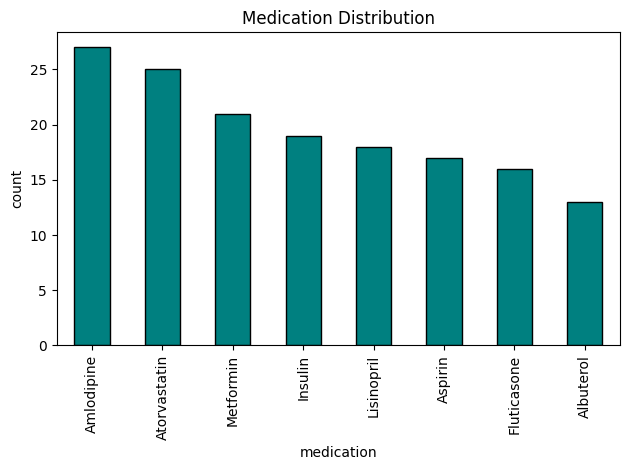

In [ ]:
#medication distribution
med_counts = df['medication'].value_counts()

med_counts.plot(kind='bar',color='teal',edgecolor='black')
plt.title('Medication Distribution')
plt.xlabel('medication')
plt.ylabel('count')
plt.tight_layout()
plt.savefig(ASSETS / 'medication_distribution.png', dpi=150)
plt.show()

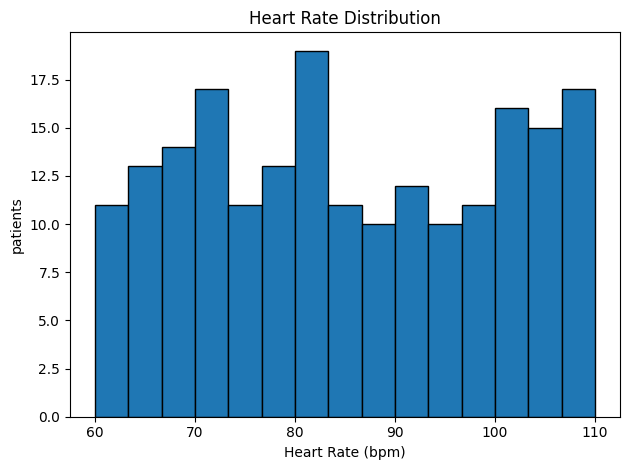

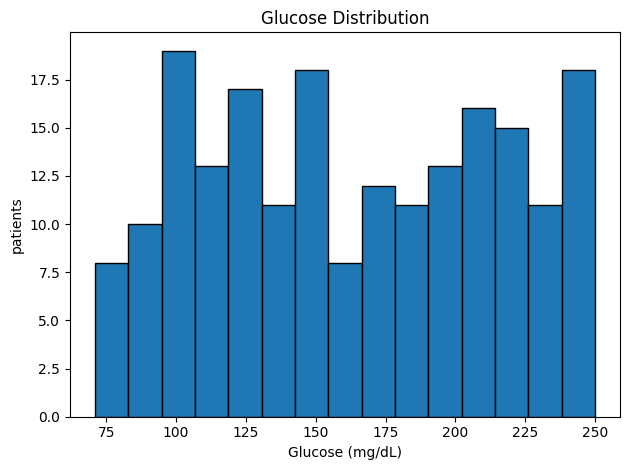

In [13]:
#Vitals Distribution(BP, HR, Glucose)

#Extract systolic and diastloic from blood pressure
df[['systolic','diastolic']] = df['blood_pressure'].str.split('/',expand=True).astype('int')

#Heart rate Distribution
plt.hist(df['heart_rate'], bins=15, edgecolor='black')
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('patients')
plt.tight_layout()
plt.savefig(ASSETS / 'heart_rate_distribution.png', dpi=150)
plt.show()

#Gluscose Distribution
plt.hist(df['glucose_level'], bins=15, edgecolor='black')
plt.title('Glucose Distribution')
plt.xlabel('Glucose (mg/dL)')
plt.ylabel('patients')
plt.tight_layout()
plt.savefig(ASSETS / 'glucose_distribution.png', dpi=150)
plt.show()




## Key Findings
- Medication Distribution: Amlodipine is the most prescribed, followed by Atorvastatin and Metformin.

- Diagnosis Distribution: Hypertension is the most common condition, while Asthma is the least.

- Glucose Distribution: Glucose levels are widely spread (70–250 mg/dL), with many patients above 100 mg/dL.

- Heart Rate Distribution: Most patients have heart rates between 70–90 bpm, aligning with normal resting range.
